# **PyFlux**

PyFlux is a library for time series analysis and prediction. We can choose from a flexible range of modeling and inference options, and use the output for forecasting. PyFlux has most of the time series prediction models such as ARIMA, Garch, etc. predefined we just need to call the model we need to analyze.

In this practice session, we will explore PyFlux and the features that are present in PyFlux for time series analysis and prediction.

## **Implementation**

We will start by installing PyFlux

In [ ]:

!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn tensorflow keras torch torchvision \
    tqdm scikit-image pmdarima pytorch_lightning pytorch_forecasting pandas_datareader --user -q --no-warn-script-location
!python -m pip install git+"https://github.com/RJT1990/pyflux.git" --user -q
import IPython
IPython.Application.instance().kernel.do_shutdown(True)


Importing required libraries

Foe exploring PyFlux we will be analyzing the stock data, we will download the stock data from ‘Yahoo’ using Pandas DataReader and the ticker for the respective stock. Let us import the libraries required.

In [6]:
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
from datetime import datetime
import pyflux as pf

ImportError: ignored

Downloading the data 

We will be using the Microsoft stock data for this article, we can download it using Pandas DataReader and Yahoo. The stock symbol for Microsoft is MSFT.

In [21]:
msft  = DataReader('MSFT',  'yahoo', datetime(2000,6,1), datetime(2020,6,1))
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-06-01,33.0000,31.90625,32.187500,32.28125,94507200.0,20.456223
2000-06-02,33.3750,32.50000,33.000000,33.15625,80463200.0,21.010702
2000-06-05,34.1875,33.00000,33.007812,33.43750,64400000.0,21.188915
2000-06-06,34.9375,33.90625,34.093750,34.81250,99019000.0,22.060255
2000-06-07,35.3750,33.56250,34.625000,35.25000,76310600.0,22.337484


Calculating the Stock Returns 

We need to calculate the return of the share and store it in a data frame named returns. This data frame will only contain the return and the date column. 

In [22]:
import pandas as pd
import numpy as np
# Finding the returns
returns = pd.DataFrame(np.diff(np.log(msft['Adj Close'].values)))
#Setting date column as index
returns.index = msft.index.values[1:msft.index.values.shape[0]]
returns.columns = ["Returns"]
returns.head()

,Returns
2000-06-02,0.026745
2000-06-05,0.008446
2000-06-06,0.040299
2000-06-07,0.012489
2000-06-08,-0.024227


Visualizing the Data

We will analyze the returns using the Matplotlib visualization library.

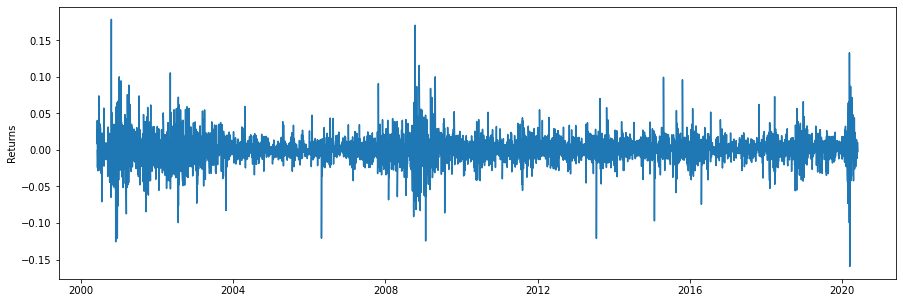

In [23]:
plt.figure(figsize=(15, 5))
plt.ylabel("Returns")
plt.plot(returns)
plt.show()

Similarly, we will use PyFlux for visualizing the ACR(Auto Correlation) Plot.

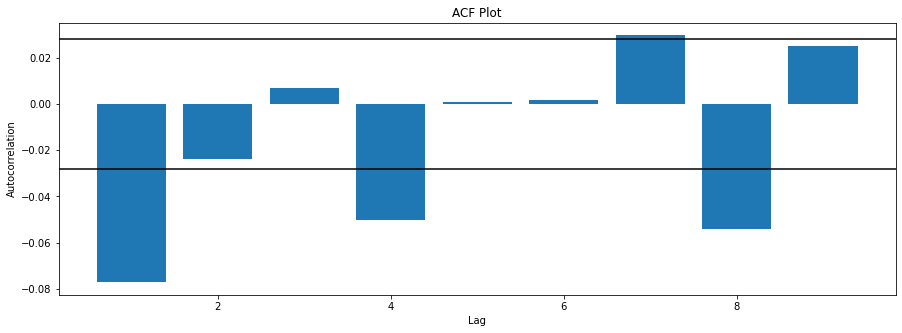

In [24]:
pf.acf_plot(returns.values.T[0])

Return analysis using different Models

Generalized Autoregressive Conditional Heteroskedasticity (GARCH) is a model that is used to analyze different types of financial data. It is used to estimate the volatility of the stock returns etc. 

We will start by creating a GARCH model which is predefined in PyFlux.

In [ ]:
gar_model = pf.GARCH(p=1, q=1, data=returns)

The above statement defines our model with ‘p’ = the number of autoregressive lags and ‘q’ =  the number of ARCH terms.

Now we will fit the model and use the summary function to display the summary of the Model.

In [18]:
gar = gar_model.fit()
gar.summary()

NameError: ignored

The next step is visualizing the fit over a  chart.

In [ ]:
gar_model.plot_fit(figsize=(15,5))

Here we can clearly visualize the estimated data with the actual data and how it picks up the volatility in the data.

The next step is visualizing the Prediction by the model. Here we will pass the ‘h’ parameter which defines the number of steps to be forecasted ahead.

In [ ]:
gar_model.plot_predict(h=20, figsize=(15,5))

ARIMA Model

ARIMA stands for AutoRegressive Integrated Moving Average. It is a class of model that works on predicting the time series data based on the previous data given. It is pre-defined in PyFlux we just need to call it.

Let us create the ARIMA model by defining the Autoregressive lags and Moving Average lags. The family is the distribution of the time series which we will be using as pf.normal. We are trying to predict ‘Returns’ so our target value is ‘Returns’.

In [ ]:
arm_model = pf.ARIMA(data=returns, ar=4, ma=4, target='Returns',  family = pf.Normal())

Similar to the GARCH model we will fit this model with our data and analyze the summary using summary function. The latent_variable attribute we will use here can be ‘M-H’ or ‘MLE’, we will be using’ MLE’

In [19]:
arm = model.fit("MLE")

NameError: ignored

In [ ]:
arm.summary()

Now similar to the steps followed for the GARCH model we will visualize the fit plot and the plot of the predicted values.

In [ ]:
arm_model.plot_fit(figsize=(15,8))

We will predict the future values with ‘past values = 200’ and 20 steps ahead for forecasting i.e value of h=20.



In [ ]:
arm_model.plot_predict(h=20,past_values=50,figsize=(15,5))

#**Related Articles:**

> * [Pyflux](https://analyticsindiamag.com/pyflux-guide-python-library-for-time-series-analysis-and-prediction/)

> * [Atspy](https://analyticsindiamag.com/hands-on-guide-to-atspy-for-automating-the-time-series-forecasting/)

> * [AutoTS](https://analyticsindiamag.com/hands-on-guide-to-autots-effective-model-selection-for-multiple-time-series/)

> * [Sktime](https://analyticsindiamag.com/sktime-library/)

> * [Time Series Forecasting with Streamlit](https://analyticsindiamag.com/how-to-deploy-time-series-forecasting-models-using-streamlit/)